# <span style="color:royalblue"><center> Estimación de la densidad de probabilidad </center></span>

In [1]:
import numpy as np
from matplotlib import pyplot 
from numpy.random import normal
from scipy.stats import norm

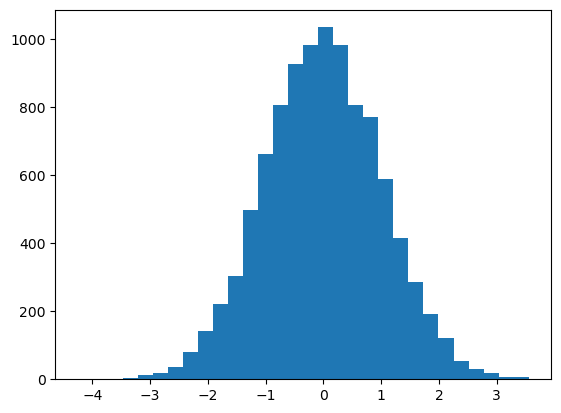

In [6]:
sample = normal(size=10000) # generador aleatorio basado en la distribución normal
pyplot.hist(sample, bins=30) 
pyplot.show()

## Estimación paramétrica

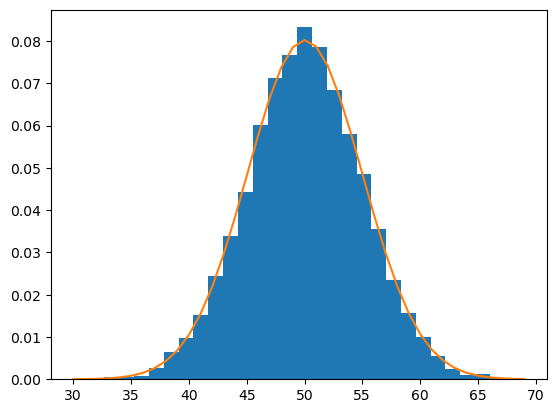

In [15]:
sample = normal(loc=50, scale=5, size=10000) # mu = 50, sigma = 5
mu = sample.mean()
sigma = sample.std()
dist = norm(mu, sigma)
values = [value for value in range(30, 70)]
probabilities = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins=30, density=True)
pyplot.plot(values, probabilities)
pyplot.show()

# Estimación no paramétrica
Indica que no vamos a hacer un uso de una única estimación sino la unión de varias de ellas. Un ejemplo de ello es la Estimación de Densidad de Kernel.

`Kernel Density estimation` 
* [parámetro de suavizado]: smoothing parameter 
* [función base]: basis function
La librería a utilizar es Scikit-learn en el link correspondiente a la [densidad](https://scikit-learn.org/stable/modules/density.html).

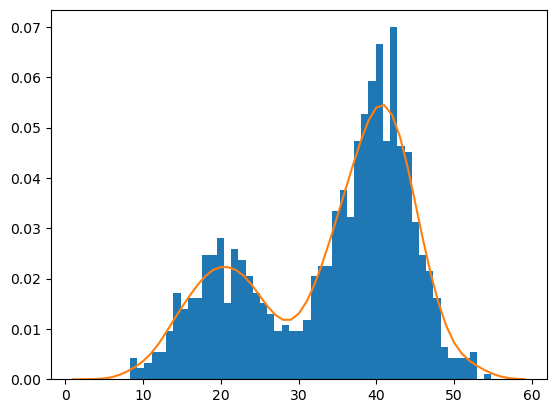

In [29]:
from numpy import hstack #gstack: juntar varios arreglos
from sklearn.neighbors import KernelDensity #El método de ajuste

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300) #Generador mu=20, sigma=5, #points=300
sample2 = normal(loc=40, scale=5, size=700) #40,5,700
sample = hstack((sample1, sample2)) #Concatena los dos arreglos

model = KernelDensity(bandwidth=2, kernel='gaussian') #Hace el uso del KernelDensity, gaussiano
#bandwidth es el parámetro de suavizado, kernel es el tipo de ajuste.
sample = sample.reshape((len(sample), 1)) #Haciendo que tenga 1 col
model.fit(sample) #Que ajuste el modelo y le haga fit a los datos de muestra

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values) #probabilidad logarítmica
probabilities = np.exp(probabilities)  # inversión de probabilidad


pyplot.hist(sample, bins=50, density=True) 
pyplot.plot(values[:], probabilities)
pyplot.show()

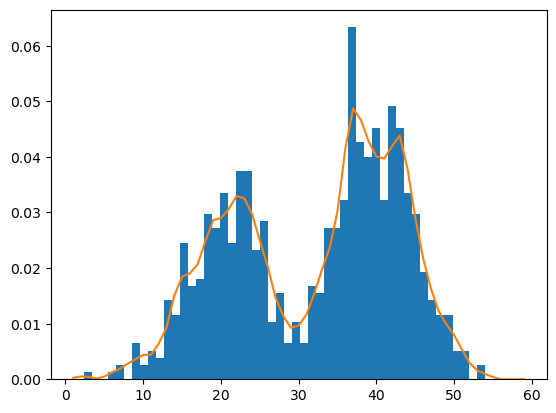

In [39]:
sample1 = normal(loc=20, scale=5, size=300) #Generador mu=20, sigma=5, #points=300
sample2 = normal(loc=40, scale=5, size=450) #40,5,700
sample = hstack((sample1, sample2)) #Concatena los dos arreglos
model = KernelDensity(bandwidth=2, kernel='cosine')
sample = sample.reshape(len(sample),1)
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
values = values.reshape((len(values), 1))

prob = model.score_samples(values)
prob = np.exp(prob)

pyplot.hist(sample, bins=50,density=True)
pyplot.plot(values,prob)

# <span style="color:royalblue"><center> MLE: Estimación de Máxima Verosimilitud </center></span>

Un framework o un esquema de trabajo más ocmún para estimar la función de densidad de probabilidad. Maximum likelihood estimation. Es una técnica que nos permite estimar densidades de probabilida dentro de un esquema de trabajo.

**El esquema de trabajo es:**
1. Escoger una distribución: Teniendo solo una muestra de datos.
2. Escoger los parámetros de la distribución: Aquellos que mejor ajusten la distribución a los datos. 

Un problema recurrente es que nosotros tenemos un modelo que se va a acercar a la realidad expresada por una muestra de la población general, no por la población en sí ya que en el mundo real no sería posible poder obtener el conjuto de todos los datos posibles. Así que hay una restricción ene l sentido de tener que ajustar a una muestra, no a una población.

El **MLE** es un problema de optimización, proque generamos el esquema de trabajo de X, un dataset, y por otro lado tengo los parámetros de la distribución que estoy buscando ajustar. Ajustarlo cómo? Hacer qu ele algoritmo intente con distintas funciones y parámetros hasta que encuentre la de más alta probabilidad, matemáticamente está descrito como:

$P(X;\theta)$ = $L(X;\theta)$



$maxL(X;\theta)$ -> $max \prod_{i} P(X_i;\theta$

$maxlog$$L(X;\theta)$ -> $max \sum_{i} logP(X_i;\theta)$


EL hecho de implementar el logaritmo es porque las máquinas de computo tienen una precisión límite de X cantidad de decimales. Siendo así, si uno multiplicara indefinidamente por el conjunto de los datos, el hecho es que significativamente llegará un espacio ene l que serán tan pequeños los valores que simplemente se va a perder precisión. Es por ello que se usa el logaritmo en donde por mera definición el logaritmo de una multiplicación es la suma de los logaritmos, así que se convierten en sumas de números. El máximo del logaritmo de la verosimilitud de L. 

# <span style="color:royalblue"><center> MLE: Caso para la regresión lineal en Machine Learning </center></span>

El ML consiste en ajustar densidades a los datos. Ya sea que haya algoritmos no supervisados (Clustering) o supervisados (Clasificación y Regresión).

$y = mx + b$ pasa a ser $y = b_0 x + b_1$, donde el $b_0$ es el peso y el $b_1$ es el bias.

<img src = ../Imagenes/mler.png>

Lo más usual es entender la regresión lineal como la minimización de los errores cuadráticos que realmente es lo mismo formalmente que un MLE.
<img src= ../Imagenes/minmax.png>

# <span style="color:royalblue"><center> Regresión Logística </center></span>
La regresión logística no resuleve un problema de regresión, sino un problema de clasificación binario, con n experimentos de Bernoulli. Para éste ejemplo está dispuesta una regresión en un problema binario. 
Aplicar el mejor modelo sigmoide a los datos.
<img src = ../Imagenes/log.png>

Entropía cruzada = CE es - la suma de las clases pro los logaritmos de sus respectivas probabildiades y como hay dos clases por cada término se suman los dos términos. Esa es la función de costo o de error siempre que haya experimentos de tipo Bernoulli. 